## Ожидаемая доходность портфеля
\begin{align}
E(R_p)=\sum_{i=1}^mw_iE(R_i)
\end{align}

In [2]:
def count_return(w:list, E:list) -> float:
    R = [w * e for w, e in zip(w, E)]
    return(sum(R))

## Ожидаемая дисперсия доходности
\begin{align}
\sigma_p^2=\sum_{i=1}^mw_i^2\sigma_i^2+\sum_i\sum_{j}w_iw_j\sigma_i\sigma_j\rho_{ij}
\end{align}

In [1]:
def count_return_variance(w_1:float, w_2:float, cov:float) -> float:
    return(w_1 * w_2 * cov)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = '/home/bakunobu/pet_projects/fin_manager/data/'

IBM = pd.read_csv(PATH+'IBM.csv')
SWN = pd.read_csv(PATH+'SWN.csv')

IBM.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-24,123.790001,126.059998,123.360001,125.680000,123.883621,4070800
1,2020-08-25,126.000000,126.820000,124.489998,124.639999,122.858490,2977700
2,2020-08-26,124.949997,125.120003,123.949997,124.169998,122.395203,3388300
3,2020-08-27,124.599998,125.099998,123.980003,124.650002,122.868347,3422700
4,2020-08-28,124.959999,125.300003,124.220001,125.070000,123.282341,3099600


In [14]:
ibm_d_2_d = IBM['Close']
ibm_diff = ibm_d_2_d.diff()
ibm_diff = ibm_diff.dropna()
ibm_diff.head()

1   -1.040001
2   -0.470001
3    0.480004
4    0.419998
5   -1.760002
Name: Close, dtype: float64

In [13]:
swn_d_2_d = SWN['Close']
swn_diff = swn_d_2_d.diff()
swn_diff = swn_diff.dropna()
swn_diff.head()

1    0.03
2   -0.13
3    0.08
4   -0.03
5   -0.08
Name: Close, dtype: float64

In [22]:
df = pd.DataFrame()
df['IBM'] = ibm_diff
df['SWN'] = swn_diff
df.head()

,IBM,SWN
1,-1.040001,0.03
2,-0.470001,-0.13
3,0.480004,0.08
4,0.419998,-0.03
5,-1.760002,-0.08


In [23]:
df.cov()

,IBM,SWN
IBM,5.196546,0.049840
SWN,0.049840,0.010614


In [30]:
a = df.cov()
print(a.iloc[0,0], a.iloc[1,1], a.iloc[1,0])

5.19654608271608 0.01061428571428571 0.049839757480798864


In [40]:
sigma_1, sigma_2, covar = a.iloc[0,0], a.iloc[1,1], a.iloc[1,0]

In [35]:
r_ibm = ibm_diff.mean()

In [36]:
r_swn = swn_diff.mean()

In [54]:
def stock_return(a, b):
    RET = []
    for x in range(11):
        r = a * (x/10) + b * (1-x/10)
        RET.append(r)
    return(RET)

E = stock_return(r_ibm, r_swn)

def ret_var(covar):
    VARIANCE = []
    for x in range(11):
        w_1 = x/10
        w_2 = (1-x/10)
        v = count_return_variance(w_1, w_1, covar)
        VARIANCE.append(-v)
    return(VARIANCE)

V = ret_var(covar)

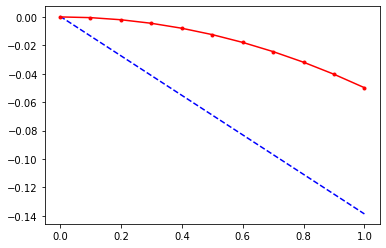

In [55]:
indices = [x/10 for x in range(11)]

plt.plot(indices, E, 'b--')
plt.plot(indices, V, 'r.-')
plt.show()


None
